In [ ]:
from PIL import Image as img
im_file = img.open("books.jpg").resize((128,128))

In [ ]:
import numpy as np
im_arr = np.array(im_file.getdata()).reshape(im_file.height,im_file.width, -1)/255

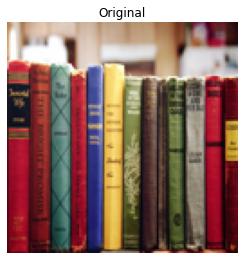

In [ ]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(50, 50))
fig.add_subplot(10,10,1)
plt.imshow(im_arr)
plt.axis('off')
plt.title("Original")
fig.show()

In [ ]:
grey_arr =[]
for i in im_arr:
  row = []
  for j in i:
    row.append(sum(j)/3)
  grey_arr.append(row)
grey_arr = np.array(grey_arr)

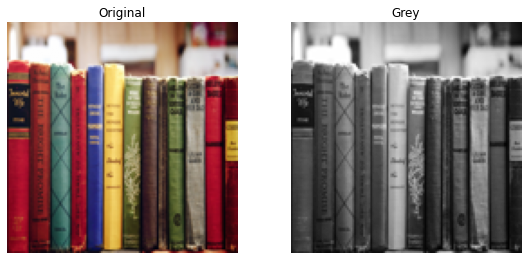

In [ ]:
fig =plt.figure(figsize=(50, 50))
fig.add_subplot(10,10,1)
plt.imshow(im_arr)
plt.axis('off')
plt.title("Original")
fig.add_subplot(10,10,2)
plt.imshow(grey_arr,cmap="gray")
plt.axis('off')
plt.title("Grey")
fig.show()

In [ ]:
blur = []
for i in range(1,grey_arr.shape[0] -1):
  row = []
  for j in range(1, grey_arr.shape[1] -1):
    lu = grey_arr[i-1][j-1]
    mu = grey_arr[i-1][j]
    ru = grey_arr[i-1][j+1]
    lm = grey_arr[i][j-1]
    mm = grey_arr[i][j]
    rm = grey_arr[i][j+1]
    ld = grey_arr[i+1][j-1]
    md = grey_arr[i+1][j]
    rd = grey_arr[i+1][j+1]

    newpix = (lu+mu+ru+lm+mm+rm+ld+md+rd)/9
    row.append(newpix)
  blur.append(row)
blur = np.array(blur)

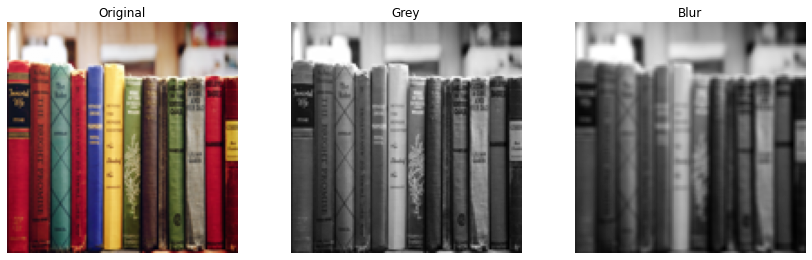

In [ ]:
fig =plt.figure(figsize=(50, 50))
fig.add_subplot(10,10,1)
plt.imshow(im_arr)
plt.axis('off')
plt.title("Original")
fig.add_subplot(10,10,2)
plt.imshow(grey_arr,cmap="gray")
plt.axis('off')
plt.title("Grey")
fig.add_subplot(10,10,3)
plt.imshow(blur,cmap="gray")
plt.axis('off')
plt.title("Blur")
fig.show()

In [ ]:
edge = grey_arr[1:-1,1:-1] - blur
div = np.amax(edge) - np.amin(edge)
min_arr = np.amin(edge) 
scaled_edge = (edge - min_arr)/div 

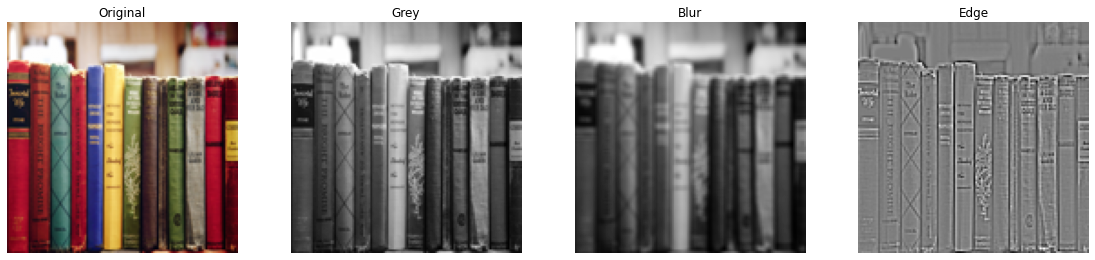

In [ ]:
fig =plt.figure(figsize=(50, 50))
fig.add_subplot(10,10,1)
plt.imshow(im_arr)
plt.axis('off')
plt.title("Original")
fig.add_subplot(10,10,2)
plt.imshow(grey_arr,cmap="gray")
plt.axis('off')
plt.title("Grey")
fig.add_subplot(10,10,3)
plt.imshow(blur,cmap="gray")
plt.axis('off')
plt.title("Blur")
fig.add_subplot(10,10,4)
plt.imshow(edge,cmap="gray")
plt.axis('off')
plt.title("Edge")
fig.show()

In [ ]:
color_arr = np.copy(im_arr[1:-1,1:-1])

In [ ]:
for i in range(color_arr.shape[0]):
  for j in range(color_arr.shape[1]):
    p = scaled_edge[i][j]
    if p<0.45 or p>0.55:
      color_arr[i][j][0] = 0
      color_arr[i][j][1] = 0
      color_arr[i][j][2] = 0

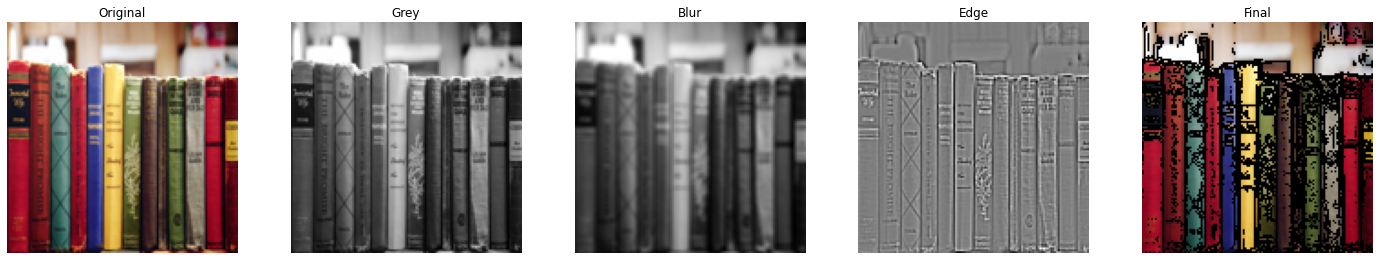

In [ ]:
fig =plt.figure(figsize=(50, 50))
fig.add_subplot(10,10,1)
plt.imshow(im_arr)
plt.axis('off')
plt.title("Original")
fig.add_subplot(10,10,2)
plt.imshow(grey_arr,cmap="gray")
plt.axis('off')
plt.title("Grey")
fig.add_subplot(10,10,3)
plt.imshow(blur,cmap="gray")
plt.axis('off')
plt.title("Blur")
fig.add_subplot(10,10,4)
plt.imshow(edge,cmap="gray")
plt.axis('off')
plt.title("Edge")
fig.add_subplot(10,10,5)
plt.imshow(color_arr)
plt.axis('off')
plt.title("Final")
fig.show()